# load datasets

In [1]:
import numpy as np
import pandas as pd
import os

# load boston housing dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()
df_boston_features = pd.DataFrame(data = boston_dataset.data, columns=boston_dataset.feature_names)
df_boston_target = pd.DataFrame(data = boston_dataset.target, columns=['price'])

# load Pima Indians Diabetes dataset
diabetes_dataset_file = './datasets/diabetes_dataset/diabetes.csv'
df_diabetes = pd.read_csv(diabetes_dataset_file)
df_diabetes_target = df_diabetes.loc[:,['Outcome']]
df_diabetes_features = df_diabetes.drop(['Outcome'], axis=1)

# load Iris flowers dataset
from sklearn.datasets import load_iris
iris_dataset = load_iris()
df_iris_features = pd.DataFrame(data = iris_dataset.data, columns=iris_dataset.feature_names)
df_iris_target = pd.DataFrame(data = iris_dataset.target, columns=['class'])


# create a synthetic regression dataset of X, Y values.
from sklearn.datasets import make_regression
SyntheticX, SyntheticY = make_regression(n_samples=50, n_features=1, noise=10.0, random_state=17)

# create a synthetic binary classification dataset with 2 features.
from sklearn.datasets import make_classification
Synthetic_BinaryClassX, Synthetic_BinaryClassY = make_classification(n_samples=50, n_features=2, n_redundant=0, n_classes=2)

In [2]:
# normalize attribute values
from sklearn.preprocessing import MinMaxScaler

diabetes_scaler = MinMaxScaler()
diabetes_scaler.fit(df_diabetes_features)
nd_diabetes_features = diabetes_scaler.transform(df_diabetes_features)
df_diabetes_features_normalized = pd.DataFrame(data=nd_diabetes_features, columns=df_diabetes_features.columns)

iris_scaler = MinMaxScaler()
iris_scaler.fit(df_iris_features)
nd_iris_features = iris_scaler.transform(df_iris_features)
df_iris_features_normalized = pd.DataFrame(data=nd_iris_features, columns=df_iris_features.columns)

x_scaler = MinMaxScaler()
x_scaler.fit(SyntheticX.reshape(-1,1))
SyntheticX = x_scaler.transform(SyntheticX.reshape(-1,1))

y_scaler = MinMaxScaler()
y_scaler.fit(SyntheticY.reshape(-1,1))
SyntheticY = y_scaler.transform(SyntheticY.reshape(-1,1))

/Users/abhishekmishra/anaconda3/envs/AWS_ML_Book/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [3]:
# print a description of the boston housing dataset.
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# creating a 75/25 training and validation set

In [4]:

# create a training dataset and a test dataset using a 75/25 split.
from sklearn.model_selection import train_test_split

boston_split = train_test_split(df_boston_features, df_boston_target, 
                              test_size=0.25, random_state=17)
df_boston_features_train = boston_split[0]
df_boston_features_test = boston_split[1]
df_boston_target_train = boston_split[2]
df_boston_target_test = boston_split[3]


diabetes_split = train_test_split(df_diabetes_features_normalized, df_diabetes_target, 
                              test_size=0.25, random_state=17)
df_diabetes_features_train = diabetes_split[0]
df_diabetes_features_test = diabetes_split[1]
df_diabetes_target_train = diabetes_split[2]
df_diabetes_target_test = diabetes_split[3]


iris_split = train_test_split(df_iris_features_normalized, df_iris_target, 
                              test_size=0.25, random_state=17)
df_iris_features_train = iris_split[0]
df_iris_features_test = iris_split[1]
df_iris_target_train = iris_split[2]
df_iris_target_test = iris_split[3]


# Linear Regression Model

In [5]:
# train a linear model on the Boston house prices dataset.
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression(fit_intercept=True)
linear_regression_model.fit(df_boston_features_train, df_boston_target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
print (linear_regression_model.coef_)

[[-1.12960344e-01  5.48578928e-02  6.71605489e-02  3.26195457e+00
  -1.70702665e+01  3.49123817e+00  7.03121906e-05 -1.37355630e+00
   3.12880217e-01 -1.32867294e-02 -9.57749225e-01  7.70369247e-03
  -5.59461017e-01]]


In [7]:
print (linear_regression_model.intercept_)

[38.51522467]


In [8]:
# use the linear model to create predictions on the test set.
predicted_median_house_prices = linear_regression_model.predict(df_boston_features_test)

Text(0.5, 1.0, 'Expected vs Predicted prices')

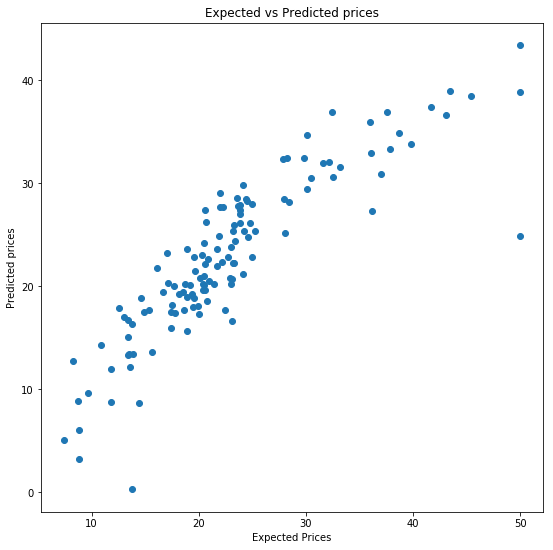

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

# use pyplot module to create a scatter plot of predicted vs expected values
fig, axes = plt.subplots(1, 1, figsize=(9,9))
plt.scatter(df_boston_target_test, predicted_median_house_prices)
plt.xlabel("Expected Prices")
plt.ylabel("Predicted prices")
plt.title("Expected vs Predicted prices")

Text(0, 0.5, 'Y')

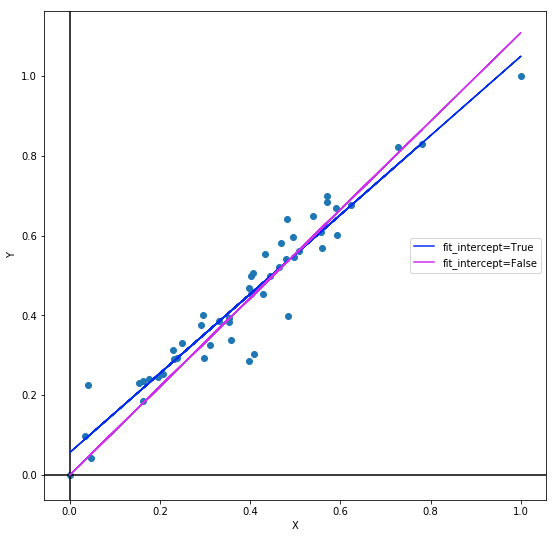

In [45]:
# demonstrate effect of fit_intercept parameter on a simple synthetic dataset.
linear_regression_model_synthetic1 = LinearRegression(fit_intercept=True)
linear_regression_model_synthetic1.fit(SyntheticX, SyntheticY)

linear_regression_model_synthetic2 = LinearRegression(fit_intercept=False)
linear_regression_model_synthetic2.fit(SyntheticX, SyntheticY)

c1 = linear_regression_model_synthetic1.coef_
i1 = linear_regression_model_synthetic1.intercept_
YPredicted1 = np.dot(SyntheticX, c1) + i1

c2 = linear_regression_model_synthetic2.coef_
i2 = linear_regression_model_synthetic2.intercept_
YPredicted2 = np.dot(SyntheticX, c2) + i2

# use pyplot module to create a scatter plot of synthetic dataset
# and overlay the regression line from the two models.
fig, axes = plt.subplots(1, 1, figsize=(9,9))
axes.axhline(y=0, color='k')
axes.axvline(x=0, color='k')

plt.scatter(SyntheticX, SyntheticY)
plt.plot(SyntheticX, YPredicted1, color='#042fed', label='fit_intercept=True')
plt.plot(SyntheticX, YPredicted2, color='#d02fed', label='fit_intercept=False')

plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

# Support Vector Machine Classification

In [11]:
# create an SVM classifier for the features of the diabetes dataset using a linear kernel
from sklearn.svm import SVC
svc_model = SVC(kernel='linear', C=1)

svc_model.fit(df_diabetes_features_train, df_diabetes_target_train.values.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [12]:
# use the SVC model to create predictions on the test set.
predicted_diabetes = svc_model.predict(df_diabetes_features_test)

In [13]:
print (predicted_diabetes)

[0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1
 0 0 0 0 1 0 1]


In [14]:
# creating linear decision boundaries in higher-dimensions

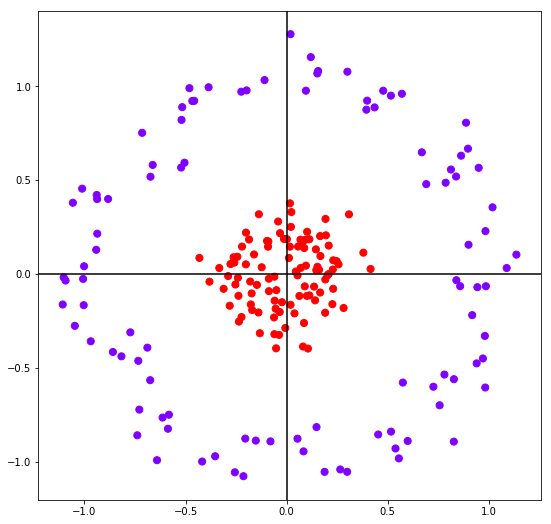

In [15]:
# import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_circles

# make a 2-dimensional binary classification dataset with 
# each point having 2 features.
X,y = make_circles(200, factor=0.2, noise=0.1) 

# create a scatter plot of the dataset, color the classes differently.
fig, axes = plt.subplots(1, 1, figsize=(9,9))

x_coordinates = X[:,0]
y_coordinates = X[:,1]

axes.scatter(x_coordinates, y_coordinates, c=y, s=50, cmap='rainbow')
axes.axhline(y=0, color='k')
axes.axvline(x=0, color='k')

plt.show()

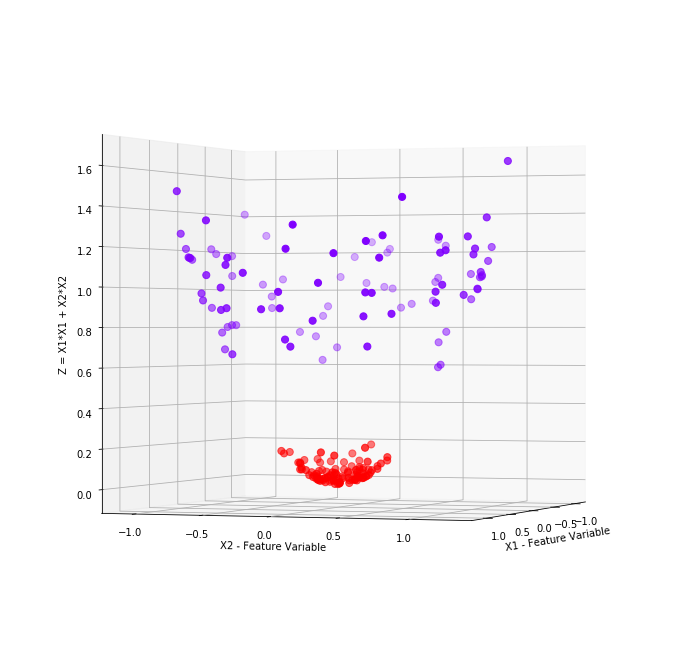

In [16]:
# create a third axis
z_coordinates = x_coordinates * x_coordinates + y_coordinates * y_coordinates

# create a 3D scatter plot of the dataset, color the classes differently.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,12))

axes = fig.add_subplot(111, projection='3d')
axes.view_init(elev=0, azim=20)

axes.scatter(x_coordinates, y_coordinates, z_coordinates, c=y, s=50, cmap='rainbow')

axes.set_xlabel('X1 - Feature Variable')
axes.set_ylabel('X2 - Feature Variable')
axes.set_zlabel('Z = X1*X1 + X2*X2')

plt.show()

In [17]:
# visualizing the decision boundaries created by different classifiers.

In [18]:
# create SVM classifiers on a two-feature synthetic dataset
# using different kernels for each classifier

# scale synthetic dataset between -3, 3
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-3,3))
scaler.fit(Synthetic_BinaryClassX.reshape(-1,1))
Synthetic_BinaryClassX = scaler.transform(Synthetic_BinaryClassX)

# create multiple SVM classifiers
from sklearn.svm import SVC
svc_model_linear = SVC(kernel='linear', C=1, gamma='auto')
svc_model_polynomial2 = SVC(kernel='poly', degree=2, C=1, gamma='auto')
svc_model_polynomial15 = SVC(kernel='poly', degree=15, C=1, gamma='auto')
svc_model_rbf = SVC(kernel='rbf', C=1, gamma='auto')

svc_model_linear.fit(Synthetic_BinaryClassX, Synthetic_BinaryClassY)
svc_model_polynomial2.fit(Synthetic_BinaryClassX, Synthetic_BinaryClassY)
svc_model_polynomial15.fit(Synthetic_BinaryClassX, Synthetic_BinaryClassY)
svc_model_rbf.fit(Synthetic_BinaryClassX, Synthetic_BinaryClassY)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

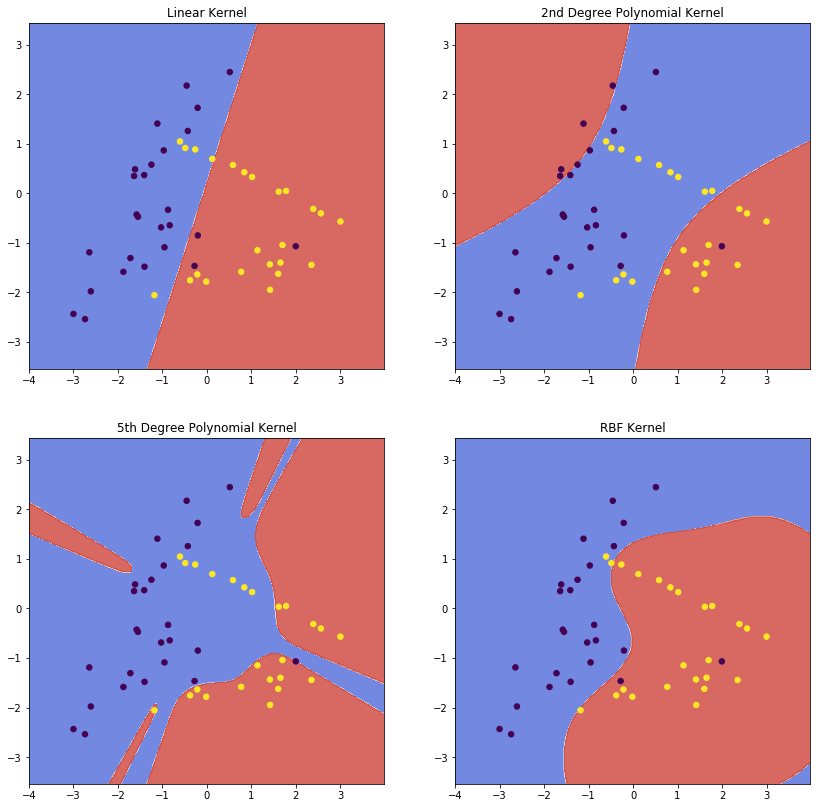

In [19]:
#
# portions of this code are from
# source: https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
#

%matplotlib inline
import matplotlib.pyplot as plt

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# pick out 2 features X0 and X1
X0 = Synthetic_BinaryClassX[:,0]
X1 = Synthetic_BinaryClassX[:,1]

xx, yy = make_meshgrid(X0, X1, 0.02)#np.meshgrid(np.arange(-3, 3, 0.002),  np.arange(-3, 3, 0.002))



fig, axes = plt.subplots(2, 2, figsize=(14,14))

# plot linear kernel
plot_contours(axes[0,0], svc_model_linear, 
              xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)   

axes[0,0].scatter(X0, X1, s=30,  c=Synthetic_BinaryClassY)
axes[0,0].set_xlim(xx.min(), xx.max())
axes[0,0].set_ylim(yy.min(), yy.max())
axes[0,0].set_title('Linear Kernel')
    
# plot 2nd degree polynomial kernel    
plot_contours(axes[0,1], svc_model_polynomial2, xx, yy, 
              cmap=plt.cm.coolwarm, alpha=0.8)

axes[0,1].scatter(X0, X1, s=30, c=Synthetic_BinaryClassY)
axes[0,1].set_xlim(xx.min(), xx.max())
axes[0,1].set_ylim(yy.min(), yy.max())
axes[0,1].set_title('2nd Degree Polynomial Kernel')

# plot 15 degree polynomial kernel
plot_contours(axes[1,0], svc_model_polynomial15, xx, yy, 
              cmap=plt.cm.coolwarm, alpha=0.8)

axes[1,0].scatter(X0, X1, s=30, c=Synthetic_BinaryClassY)
axes[1,0].set_xlim(xx.min(), xx.max())
axes[1,0].set_ylim(yy.min(), yy.max())
axes[1,0].set_title('5th Degree Polynomial Kernel')

# plot RBF kernel
plot_contours(axes[1,1], svc_model_rbf, xx, yy, 
              cmap=plt.cm.coolwarm, alpha=0.8)

axes[1,1].scatter(X0, X1, s=30, c=Synthetic_BinaryClassY)
axes[1,1].set_xlim(xx.min(), xx.max())
axes[1,1].set_ylim(yy.min(), yy.max())
axes[1,1].set_title('RBF Kernel')

plt.show()


# Support Vector Machine Regression

Text(0.5, 1.0, 'Expected vs Predicted prices')

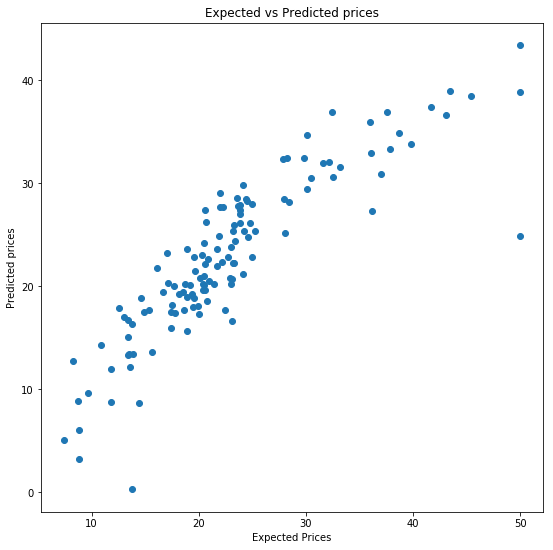

In [20]:
# train a linear model on the Boston house prices dataset.
from sklearn.svm import SVR
svr_model = SVR(kernel='linear', C=1.5, gamma='auto', epsilon=1.5)
svr_model.fit(df_boston_features_train, df_boston_target_train.values.ravel())

# use the SCR model to create predictions on the test set.
svr_predicted_prices = svr_model.predict(df_boston_features_test)

%matplotlib inline
import matplotlib.pyplot as plt

# use pyplot module to create a scatter plot of predicted vs expected values
fig, axes = plt.subplots(1, 1, figsize=(9,9))
plt.scatter(df_boston_target_test, predicted_median_house_prices)
plt.xlabel("Expected Prices")
plt.ylabel("Predicted prices")
plt.title("Expected vs Predicted prices")

# Binary Logistic Regression

In [21]:
# train a logistic regression model on the Boston house prices dataset.
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(penalty='l2', fit_intercept=True, solver='liblinear')
logistic_regression_model.fit(df_diabetes_features_train, df_diabetes_target_train.values.ravel())

# use the  model to create predictions on the test set, with a threshold of 0.5
logistic_regression_predictions = logistic_regression_model.predict(df_diabetes_features_test)

In [22]:
print (logistic_regression_predictions)

[0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 1 0 0]


In [23]:
# access class-wise probabilities
logistic_regression_probabilities = logistic_regression_model.predict_proba(df_diabetes_features_test)

In [24]:
print (logistic_regression_probabilities)

[[0.85694005 0.14305995]
 [0.37165061 0.62834939]
 [0.73695232 0.26304768]
 [0.880803   0.119197  ]
 [0.70516787 0.29483213]
 [0.55565012 0.44434988]
 [0.79759532 0.20240468]
 [0.41521706 0.58478294]
 [0.40539318 0.59460682]
 [0.45727931 0.54272069]
 [0.36492866 0.63507134]
 [0.37971139 0.62028861]
 [0.77569099 0.22430901]
 [0.58385946 0.41614054]
 [0.76774197 0.23225803]
 [0.81174178 0.18825822]
 [0.48426592 0.51573408]
 [0.81058485 0.18941515]
 [0.63841705 0.36158295]
 [0.64774812 0.35225188]
 [0.46058037 0.53941963]
 [0.73207878 0.26792122]
 [0.86982262 0.13017738]
 [0.26364759 0.73635241]
 [0.62668563 0.37331437]
 [0.77056865 0.22943135]
 [0.28582594 0.71417406]
 [0.91957668 0.08042332]
 [0.49911929 0.50088071]
 [0.67216545 0.32783455]
 [0.37647145 0.62352855]
 [0.67616386 0.32383614]
 [0.83388024 0.16611976]
 [0.83247743 0.16752257]
 [0.70948957 0.29051043]
 [0.88923481 0.11076519]
 [0.36769165 0.63230835]
 [0.64198316 0.35801684]
 [0.86469324 0.13530676]
 [0.59910864 0.40089136]


In [25]:
# implement custom thresholding logic
dfProbabilities = pd.DataFrame(logistic_regression_probabilities[:,0])
predictions = dfProbabilities.applymap(lambda x: 0 if x > 0.8 else 1)

In [26]:
print (predictions.values.ravel())

[0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1
 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1]


In [27]:
print (logistic_regression_model.coef_)

[[ 1.48972976  3.4891602  -0.7344297  -0.07461329  0.16776565  1.81409369
   1.39383873  1.03554067]]


In [28]:
print (logistic_regression_model.intercept_)

[-4.06714158]


In [29]:
#Multinomial Logistic Regression

In [30]:
# implementing multi-class classification using 
# OVA (a.ka. OVR) approach and LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(penalty='l2', fit_intercept=True, solver='liblinear')
ovr_logit_model = OneVsRestClassifier(logit_model)

ovr_logit_model.fit(df_iris_features_train, df_iris_target_train.values.ravel())

# use the  model to create predictions on the test set, with a threshold of 0.5
ovr_logit_predictions = ovr_logit_model.predict(df_iris_features_test)

print (ovr_logit_predictions)

[0 2 2 1 2 2 2 2 1 2 2 0 1 0 2 0 0 2 2 2 2 0 2 1 2 2 1 1 0 1 0 1 0 0 1 2 1
 2]


In [31]:
# access class-wise probabilities
ovr_logit_probs = ovr_logit_model.predict_proba(df_iris_features_test)
print(ovr_logit_probs)

[[0.82272514 0.12785864 0.04941622]
 [0.12044579 0.40056122 0.47899299]
 [0.02542865 0.32329645 0.6512749 ]
 [0.18305903 0.42111625 0.39582472]
 [0.05944138 0.38763397 0.55292465]
 [0.07236737 0.36312485 0.56450777]
 [0.16344427 0.37963956 0.45691617]
 [0.01998424 0.24601841 0.73399734]
 [0.18950936 0.48395363 0.32653701]
 [0.03663432 0.40209894 0.56126674]
 [0.02062532 0.27783051 0.70154417]
 [0.73577162 0.22066942 0.04355896]
 [0.15270279 0.42746281 0.41983439]
 [0.77216659 0.18251154 0.04532187]
 [0.05309898 0.32231709 0.62458393]
 [0.815817   0.13825926 0.04592374]
 [0.73489217 0.22191513 0.0431927 ]
 [0.04491288 0.36458749 0.59049964]
 [0.02065056 0.27871118 0.70063826]
 [0.02127991 0.35388486 0.62483523]
 [0.07152985 0.41695375 0.5115164 ]
 [0.7706894  0.18349734 0.04581325]
 [0.07040028 0.36307885 0.56652087]
 [0.19267192 0.4727485  0.33457958]
 [0.15280003 0.38212573 0.46507424]
 [0.17395557 0.31901921 0.50702523]
 [0.12736739 0.48820204 0.38443056]
 [0.13568065 0.44198711 0.42

In [32]:
# implement multi-class classification using 
# softmax (a.k.a multinomial regression) classifier
from sklearn.linear_model import LogisticRegression

softmax_logit_model = LogisticRegression(penalty='l2', fit_intercept=True, solver='lbfgs', multi_class='multinomial')
softmax_logit_model.fit(df_iris_features_train, df_iris_target_train.values.ravel())

# use the  model to create predictions on the test set
softmax_logit_predictions = softmax_logit_model.predict(df_iris_features_test)

print (softmax_logit_predictions)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 1 0 2 1 1 2 1 1 0 1 0 1 0 0 1 1 1
 2]


In [33]:
# access class-wise probabilities
softmax_logit_probs = softmax_logit_model.predict_proba(df_iris_features_test)
print(softmax_logit_probs)

[[0.89582633 0.09444564 0.00972803]
 [0.09889138 0.50828121 0.39282741]
 [0.01311439 0.23998685 0.74689876]
 [0.1645445  0.56290434 0.27255115]
 [0.04525701 0.42873174 0.52601125]
 [0.05219811 0.40090084 0.54690105]
 [0.1412285  0.49318467 0.36558684]
 [0.00512255 0.1226479  0.87222954]
 [0.18517246 0.6381944  0.17663314]
 [0.0301524  0.40920296 0.56064464]
 [0.00767857 0.15588852 0.83643291]
 [0.85228205 0.14095824 0.00675971]
 [0.1344201  0.56001268 0.30556722]
 [0.87716333 0.11550045 0.00733622]
 [0.03095013 0.30494959 0.66410028]
 [0.89925442 0.09260716 0.00813842]
 [0.86906457 0.12521241 0.00572302]
 [0.0286017  0.35588746 0.61551083]
 [0.00777372 0.15176958 0.84045669]
 [0.01219112 0.26741715 0.72039173]
 [0.05557848 0.49114599 0.45327553]
 [0.86733298 0.12475638 0.00791064]
 [0.05107527 0.39427714 0.55464759]
 [0.18367433 0.62661521 0.18971046]
 [0.1288656  0.49409071 0.37704369]
 [0.12588161 0.41550633 0.45861205]
 [0.12692498 0.64014023 0.23293479]
 [0.11348037 0.57595155 0.31

# decision tree models

In [34]:
# create a decision tree based multi-class classifier.
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier(max_depth=4)
dtree_model.fit(df_iris_features_train, df_iris_target_train.values.ravel())

# use the  model to create predictions on the test set
dtree_predictions = dtree_model.predict(df_iris_features_test)

print (dtree_predictions)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 1 0 2 1 1 1 1 1 0 1 0 1 0 0 1 1 1
 2]


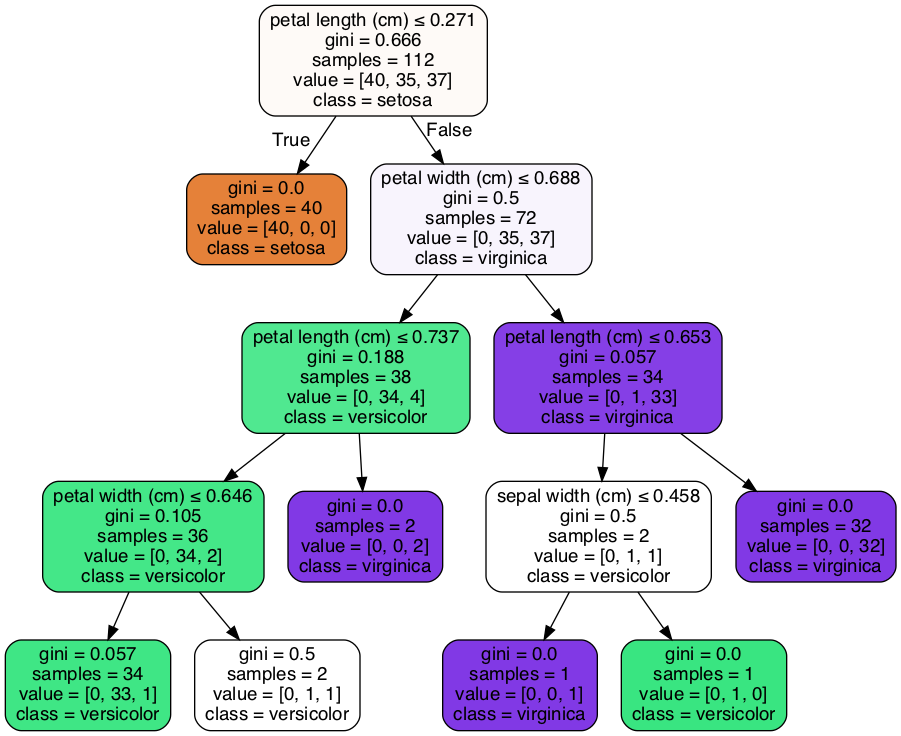

In [35]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names = df_iris_features_train.columns.values,
               class_names=iris_dataset.target_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [36]:
# access class-wise probabilities
dtree_probs = dtree_model.predict_proba(df_iris_features_test)
print(dtree_probs)

[[1.         0.         0.        ]
 [0.         0.97058824 0.02941176]
 [0.         0.         1.        ]
 [0.         0.97058824 0.02941176]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         0.97058824 0.02941176]
 [0.         0.         1.        ]
 [0.         0.97058824 0.02941176]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [0.         0.97058824 0.02941176]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         0.97058824 0.02941176]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.         0.97058824 0.02941176]
 [0.         0.97058824 0.02941176]
 [0.         0.97058824 0.02941176]
 [0.         0.97058824 0.02941176]
 [0.         0.97058824 0.02

In [37]:
# create a decision tree based regressor on the Boston house prices dataset.
from sklearn.tree import DecisionTreeRegressor

dtree_reg_model = DecisionTreeRegressor(max_depth=4)
dtree_reg_model.fit(df_boston_features_train, df_boston_target_train.values.ravel())

# use the  model to create predictions on the test set
dtree_reg_predictions = dtree_reg_model.predict(df_boston_features_test)

Text(0.5, 1.0, 'Expected vs Predicted prices')

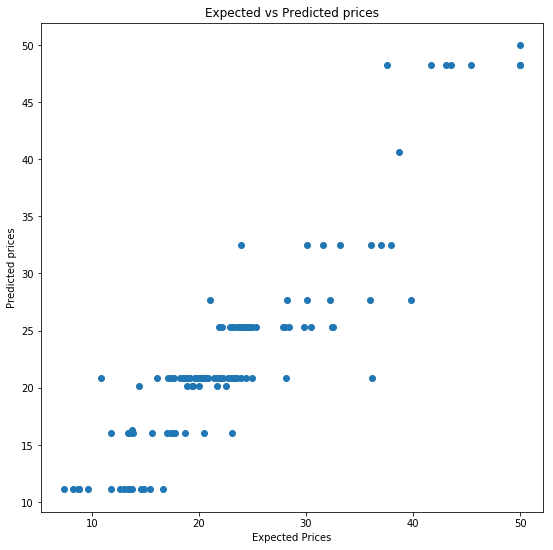

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

# use pyplot module to create a scatter plot of predicted vs expected values
fig, axes = plt.subplots(1, 1, figsize=(9,9))
plt.scatter(df_boston_target_test, dtree_reg_predictions)
plt.xlabel("Expected Prices")
plt.ylabel("Predicted prices")
plt.title("Expected vs Predicted prices")

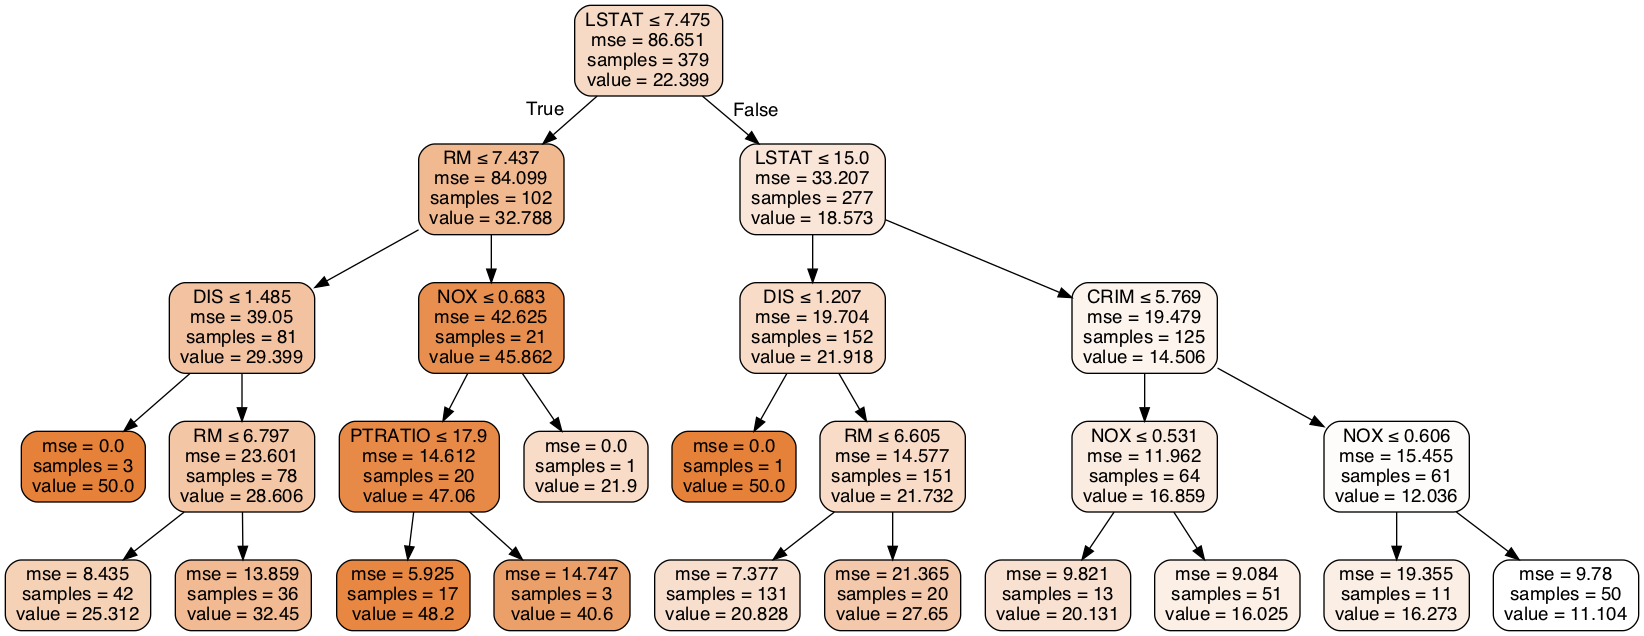

In [39]:
# render the decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree_reg_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names = df_boston_features_train.columns.values)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())